In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler   # for Scaling
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Case Study

In [9]:
# Load the data frame
Leads = pd.read_csv('Leads.csv')

In [10]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [12]:
Leads.shape

(9240, 37)

In [13]:
# Lets see the percentage of missing values for each columns
round(100 * (Leads.isnull().sum() / len(Leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Checking the different category counts in categorical column 'Lead Quality'
Leads['Lead Quality'].value_counts().sum()

4473

In [15]:
Leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### We see that we have column 'Lead Quality' which has more than 51.59 % data missing, other top columns as below which has high percentage of data missing <br>
Asymmetrique Activity Index                      45.65 %
<br>Asymmetrique Profile Index                       45.65 %
<br>Asymmetrique Activity Score                      45.65 %
<br>Asymmetrique Profile Score                       45.65 %
<br>
#### So, It is better to drop these columns as even if we impute these values, we will be imputing 50 % values and which can effect the final result.

In [16]:
col = Leads.columns

In [17]:
col.shape

(37,)

In [18]:
lead_copy1 = Leads.copy()

In [19]:
# assign column to drop_col1 which needs to be dropped which has very null values
drop_col1 = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

In [20]:
drop_col1

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [21]:
lead_copy2 = lead_copy1.drop(drop_col1,axis=1)

In [22]:
lead_copy1.shape

(9240, 37)

In [23]:
lead_copy2.shape

(9240, 32)

In [24]:
# Lets see the percentage of missing values for each columns
round(100 * (lead_copy2.isnull().sum() / len(lead_copy2)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [25]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


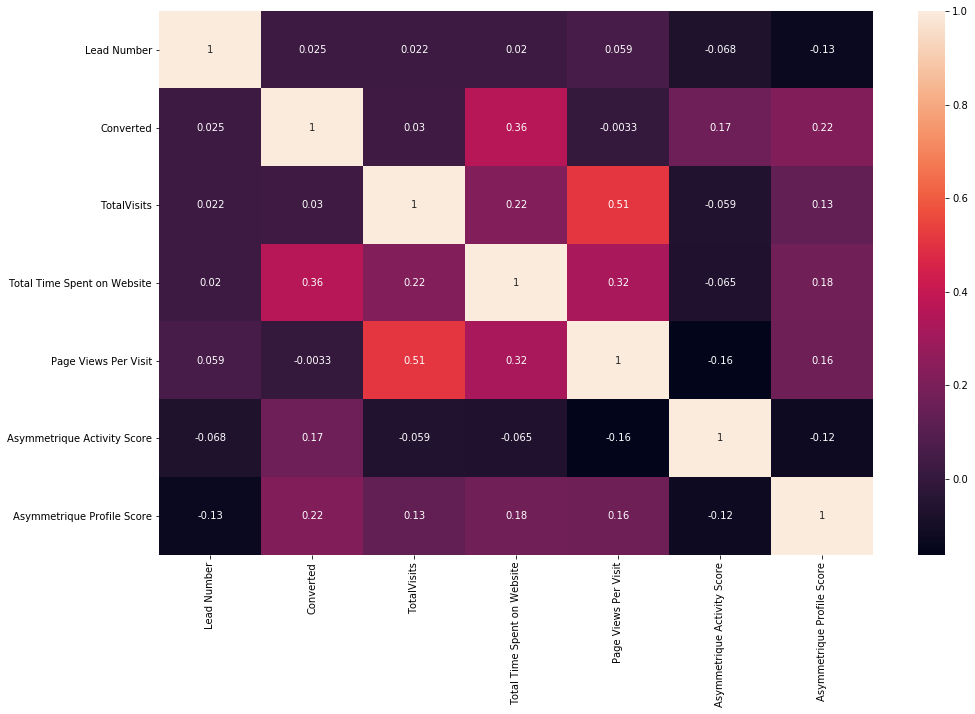

In [26]:
plt.figure(figsize=[16,10])
sns.heatmap(Leads.corr() , annot=True)
plt.show()

In [27]:
100 * (lead_copy2.isnull().sum()/len(lead_copy2))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [28]:
# looks like 26.63% data is missing and 6492 data is selected as 'India', There is no variation in data and looks like all belongs to India, so It is okay to drop this column.
# I will drop this column from data frame
lead_copy2['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Sweden                     3
Uganda                     2
Ghana                      2
Asia/Pacific Region        2
China                      2
Netherlands                2
Italy                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Kenya                      1
Malaysia                   1
Tanzania                   1
Sri Lanka                  1
Indonesia                  1
Switzerland                1
Liberia       

In [29]:
# As we can see 24% data has not been selected by users and also It has 15.56% data missing in overall Data Frame.
# So, It is better to drop this column, Even if we impute the values with mode 'Select', It will be baised.
100 * (lead_copy1['Specialization'].value_counts() / lead_copy1['Specialization'].value_counts().sum())

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [30]:
# looks like 5043 data is selected as 'Select' that is doesn't make sense and I am going to drop this column
# 24 % missing values , and also most of the values are as select which means no useful information, so I am going to drop this column.
100 * (lead_copy2['How did you hear about X Education'].value_counts() / lead_copy2['How did you hear about X Education'].value_counts().sum())
# Select                   72 % data has not been filled , So It is better to drop this column.

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [31]:
# 29.112554 % missing values , can be imputed with mode which 'Unemployed'
lead_copy2['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# 29.318182 % missing values , can be imputed with mode which 'Better Career Prospects' , but there is no variation in data even if we impute the valu with 'Better Career Prospects'.
# I am going to drop this column.
lead_copy2['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
drop_col2 = ['Country','Specialization','How did you hear about X Education','What matters most to you in choosing a course','Tags']

In [34]:
lead_copy3 = lead_copy2.drop(drop_col2,axis=1)

In [35]:
lead_copy3.shape

(9240, 27)

In [36]:
# Checking for all columns - percentage of missing values
100 * (lead_copy3.isnull().sum()/len(lead_copy3))

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [37]:
Leads.shape

(9240, 37)

In [38]:
# I will drop this column as It has 15 % missing values and also 28 % only Select which again means NaN.
100 * (lead_copy3['City'].value_counts() / lead_copy3['City'].value_counts().sum() )

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [39]:
100 * ( lead_copy3['Lead Profile'].value_counts() / lead_copy3['Lead Profile'].value_counts().sum())

# As we see , 63% users has not filled the values and we also have 29.32 % data missing data , so it is better to drop this column.
# I will drop this column.

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [40]:
# Lets drop 'City' and 'Lead Profile'
drop_col3 = ['City','Lead Profile']

In [41]:
lead_copy4 = lead_copy3.drop(drop_col3,axis=1)

In [42]:
lead_copy4.shape

(9240, 25)

In [43]:
100 * (lead_copy4.isnull().sum()/len(lead_copy4))

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

## Impute the values for column "What is your current occupation" and Tags with mode

In [44]:
mode_val_1 = lead_copy4['What is your current occupation'].mode()

In [45]:
mode_val_1

0    Unemployed
dtype: object

In [46]:
lead_copy4['What is your current occupation'].mode()[0]

'Unemployed'

In [47]:
## Imputing with Mode of the column
lead_copy4['What is your current occupation'].fillna(lead_copy4['What is your current occupation'].mode()[0], inplace=True)

In [48]:
lead_copy4['What is your current occupation'].shape

(9240,)

In [49]:
lead_copy4['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
Leads.shape

(9240, 37)

In [51]:
lead_copy4['What is your current occupation'].isna().sum()

0

In [52]:
100 * (lead_copy4.isnull().sum()/len(lead_copy4))

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [53]:
lead_copy4.shape

(9240, 25)

In [54]:
100 * (lead_copy4.isnull().sum()/len(lead_copy4))

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [55]:
# Lets drop the rows for all null values 
lead_copy4.dropna(inplace=True)

In [56]:
100 * (lead_copy4.isnull().sum()/len(lead_copy4))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [57]:
lead_copy4.shape

(9074, 25)

#### We recuced the rows form 9240 to 9074 which should be okay as we have not remove much records

In [58]:
df_final = lead_copy4.copy()

In [59]:
df_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [60]:
df_final.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


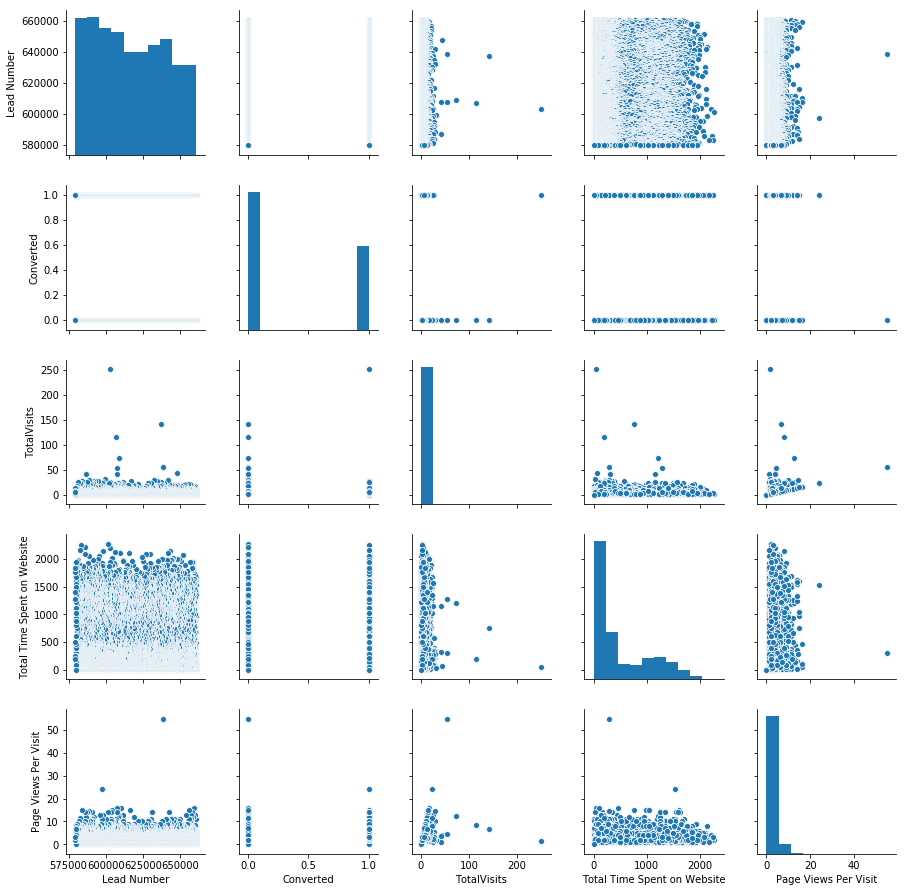

In [61]:
sns.pairplot(df_final)

In [62]:
df_final.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 

In [64]:
df_final.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,No,No,No,No,No,No,No,No,Email Opened


In [65]:
df_final.drop('Prospect ID',axis=1, inplace=True)

In [66]:
df_final.drop('Lead Number',axis=1, inplace=True)

In [67]:
df_final.shape

(9074, 23)

In [68]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified


In [69]:
# as we donot need lead Number and 'Prospect ID'. I am dropping these columns

In [70]:
df_final.shape

(9074, 23)

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074

In [72]:
# Since the magazine has only no , We are going to drop the column.
df_final['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [73]:
df_final.drop('Magazine',axis=1,inplace=True)

In [74]:
# We are going to drop this column 
df_final['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [75]:
df_final.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [76]:
# We are going to drop this column 
df_final['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [77]:
df_final.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [78]:
# We are going to drop this column 
df_final['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [79]:
df_final.drop('Get updates on DM Content',axis=1,inplace=True)

In [80]:
# We are going to drop this column 
df_final['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [81]:
df_final.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [82]:
df_final['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [83]:
# List of variables to map for encoding for columns having only Yes and No.

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_final[varlist] = df_final[varlist].apply(binary_map)

In [84]:
df_final.shape

(9074, 18)

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Do Not Call                               9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
What is your current occupation           9074 non-null object
Search                                    9074 non-null int64
Newspaper Article                         9074 non-null int64
X Education Forums                        9074 non-null int64
Newspaper                                 9074 non-null int64
Digital Advertise

In [86]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_final[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df_final = pd.concat([df_final, dummy1], axis=1)

In [87]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
dummy1.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phon

In [89]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [90]:
df_final.shape

(9074, 77)

In [91]:
# We are going to drop the original categorical columns after creating dummies.
drop_col2 = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']

In [92]:
df_final.drop(drop_col2,axis=1,inplace=True)

In [93]:
df_final.shape

(9074, 72)

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 72 columns):
Do Not Email                                            9074 non-null int64
Do Not Call                                             9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Search                                                  9074 non-null int64
Newspaper Article                                       9074 non-null int64
X Education Forums                                      9074 non-null int64
Newspaper                                               9074 non-null int64
Digital Advertisement                                   9074 non-null int64
Through Recommendations                              

In [95]:
df_final.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
df_final.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_final.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1373.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,10.000000,1557.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


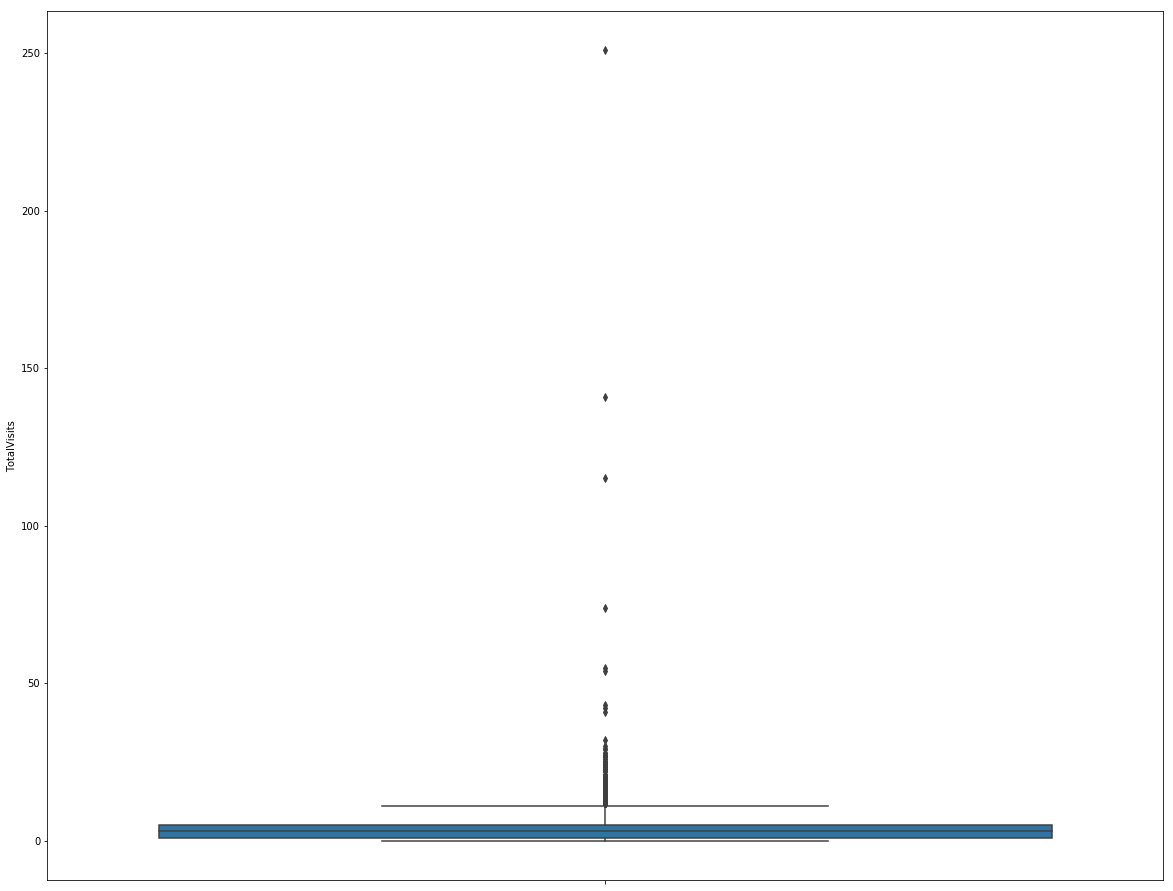

In [98]:
# Outlier treatment
plt.figure(figsize=[20,16])
sns.boxplot(y='TotalVisits', data=df_final)
plt.show()

In [99]:
# removing (statistical) outliers
Q1 = df_final.TotalVisits.quantile(0.05)
Q3 = df_final.TotalVisits.quantile(0.99)
IQR = Q3 - Q1
df_final = df_final[(df_final.TotalVisits >= Q1) & (df_final.TotalVisits <= Q3)]

In [100]:
df_final.shape

(8991, 72)

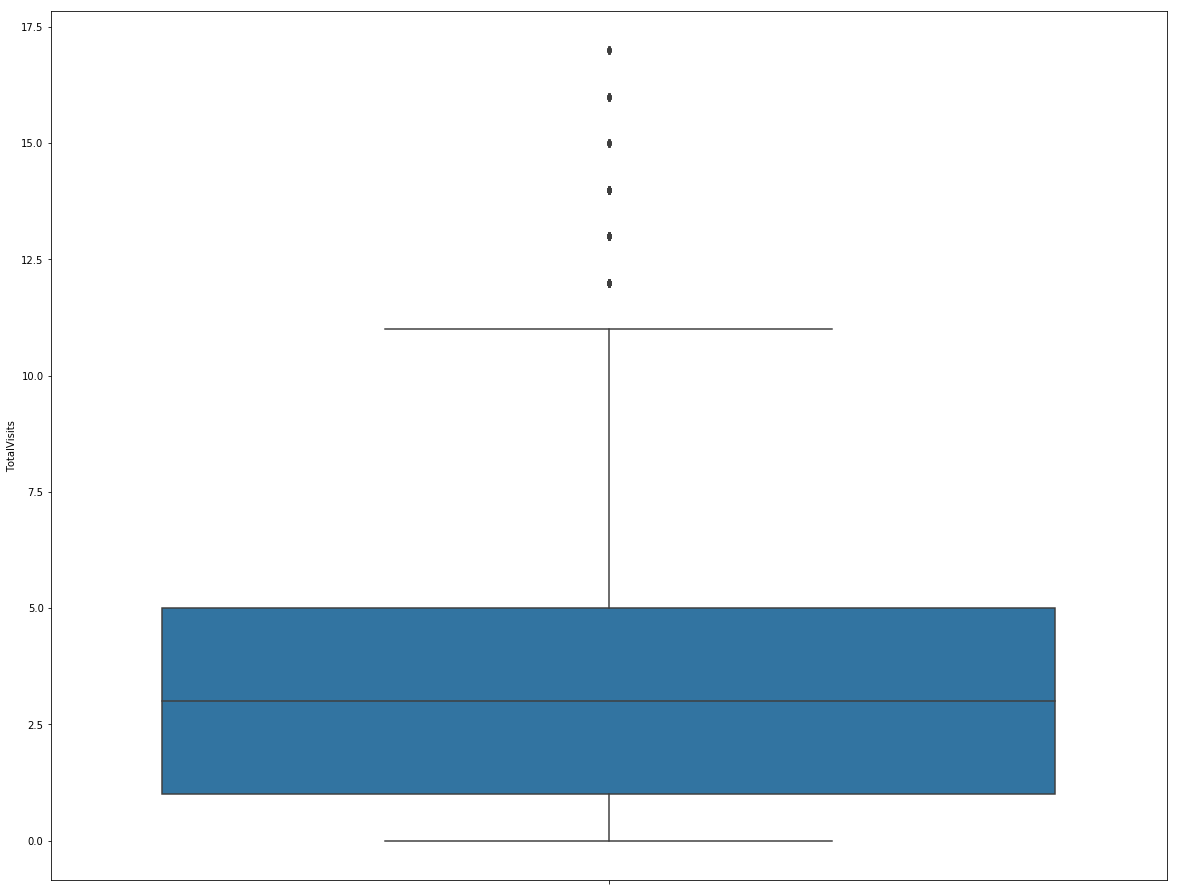

In [101]:
# Outlier treatment
plt.figure(figsize=[20,16])
sns.boxplot(y='TotalVisits', data=df_final)
plt.show()

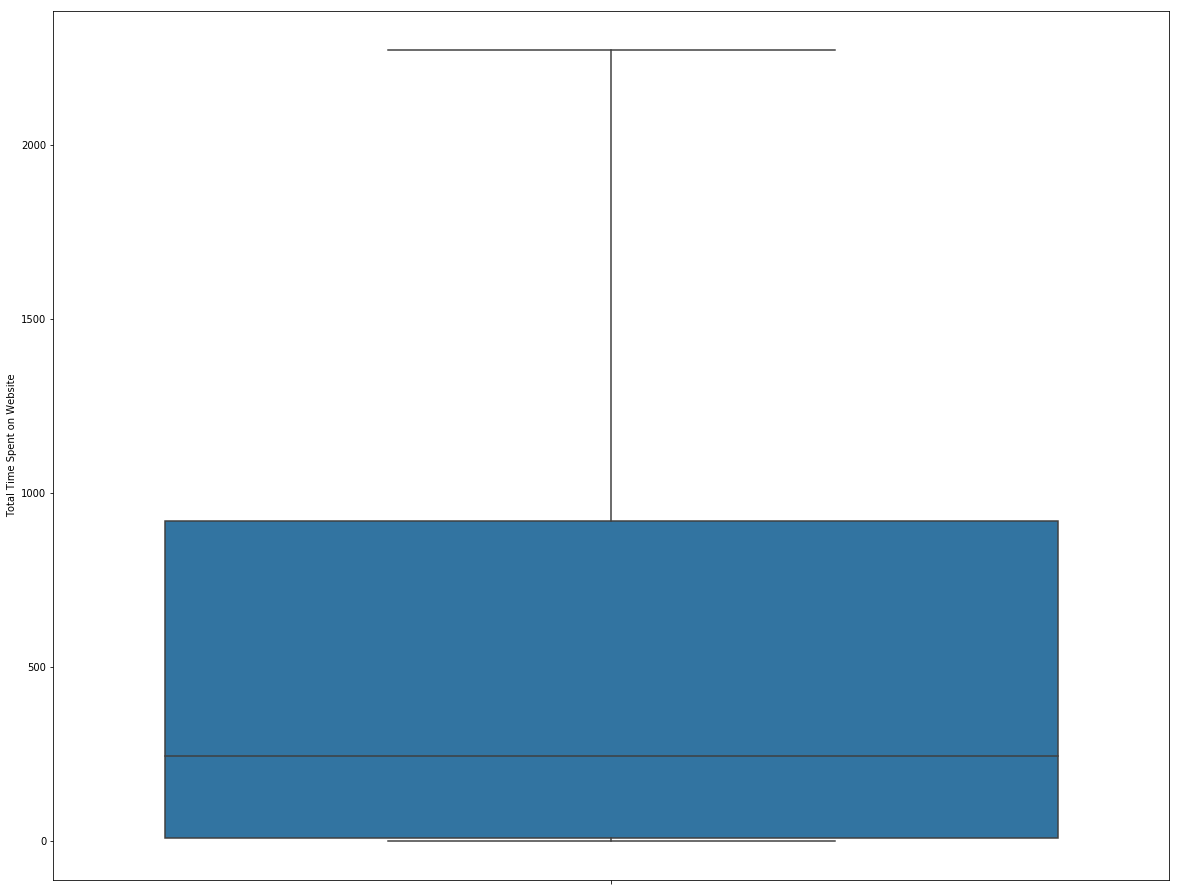

In [102]:
# Outlier treatment , This doesn't have any outliers and data seems to be good.
plt.figure(figsize=[20,16])
sns.boxplot(y='Total Time Spent on Website', data=df_final)
plt.show()

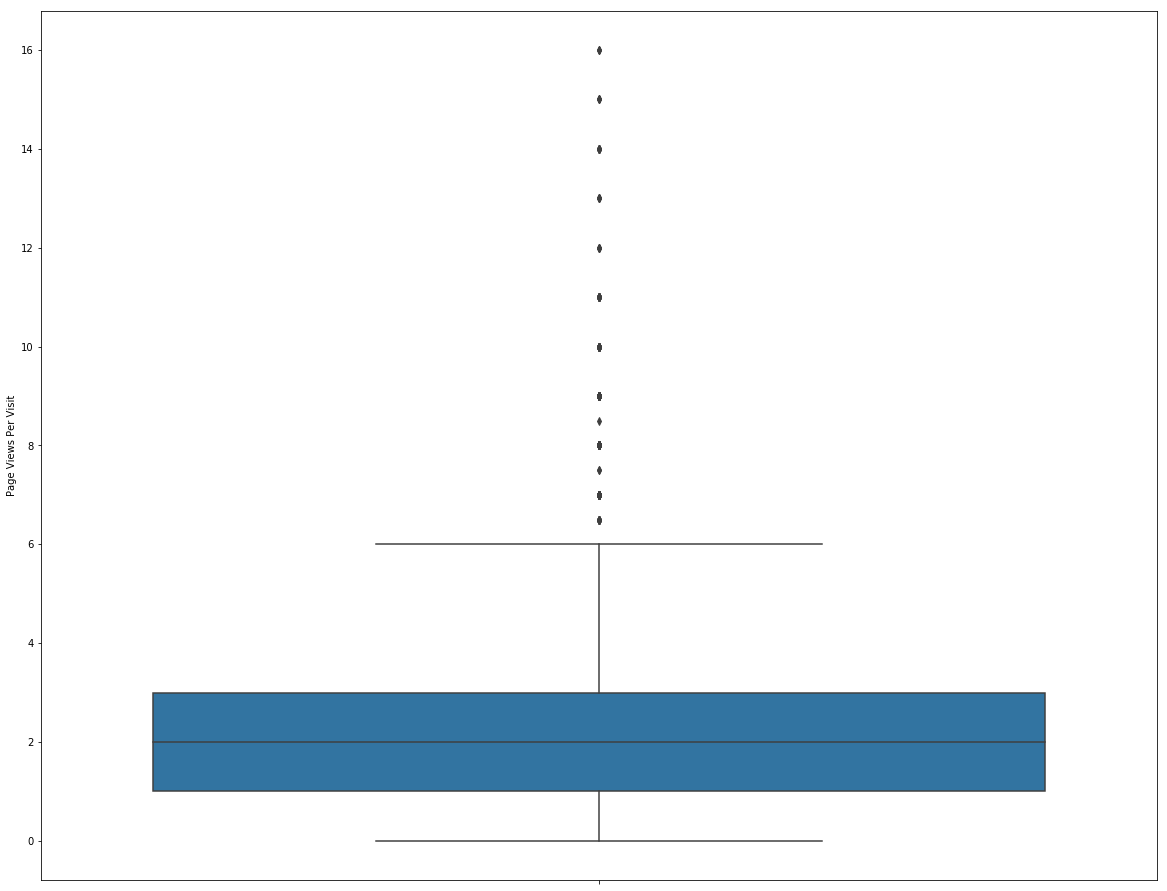

In [103]:
# Outlier treatment , This doesn't have any outliers and data seems to be good.
plt.figure(figsize=[20,16])
sns.boxplot(y='Page Views Per Visit', data=df_final)
plt.show()

In [104]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_final.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.0,8991.000000,...,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,0.077744,0.000222,0.378045,3.217106,481.305973,2.344587,0.001446,0.000111,0.0,0.000111,...,0.000111,0.001446,0.361473,0.020242,0.032143,0.000111,0.237905,0.003559,0.005005,0.000111
std,0.267784,0.014914,0.484926,2.989530,544.883763,2.061548,0.037999,0.010546,0.0,0.010546,...,0.010546,0.037999,0.480454,0.140836,0.176390,0.010546,0.425824,0.059555,0.070573,0.010546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,245.000000,2.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1372.000000,5.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,9.000000,1555.500000,6.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [105]:
df_final.shape

(8991, 72)

In [106]:
y = df_final['Converted']

In [107]:
y.shape

(8991,)

In [108]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
df_final.drop('Converted',axis=1,inplace=True)

In [110]:
df_final.shape

(8991, 71)

In [111]:
X = df_final.copy()

In [112]:
import warnings


In [113]:
# import the package
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [114]:
X_train.shape

(6293, 71)

In [115]:
X_test.shape

(2698, 71)

In [116]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8692,0,0,3.0,304,1.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6126,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5198,0,0,3.0,425,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,0,0,4.0,861,4.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9225,1,0,2.0,74,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Scaling all feature

In [117]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0,0,0.246579,0.764873,0.777363,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
108,0,0,0.908719,-0.148599,0.298183,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7858,0,0,2.564067,-0.649536,-0.554758,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5220,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3871,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6293.000000,6293.000000,6.293000e+03,6.293000e+03,6.293000e+03,6293.000000,6293.000000,6293.0,6293.000000,6293.000000,...,6293.0,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000
mean,0.080089,0.000318,-4.318808e-17,1.515464e-16,2.055668e-16,0.001748,0.000159,0.0,0.000159,0.000318,...,0.0,0.001748,0.356110,0.020340,0.033053,0.000159,0.237407,0.003973,0.004608,0.000159
std,0.271452,0.017826,1.000079e+00,1.000079e+00,1.000079e+00,0.041776,0.012606,0.0,0.012606,0.017826,...,0.0,0.041776,0.478886,0.141172,0.178788,0.012606,0.425527,0.062909,0.067733,0.012606
min,0.000000,0.000000,-1.077699e+00,-8.815872e-01,-1.139357e+00,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.466298e-01,-8.613288e-01,-6.601771e-01,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-8.449037e-02,-4.340595e-01,-1.809972e-01,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.776490e-01,7.961814e-01,4.563121e-01,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,4.550485e+00,3.302705e+00,6.527522e+00,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


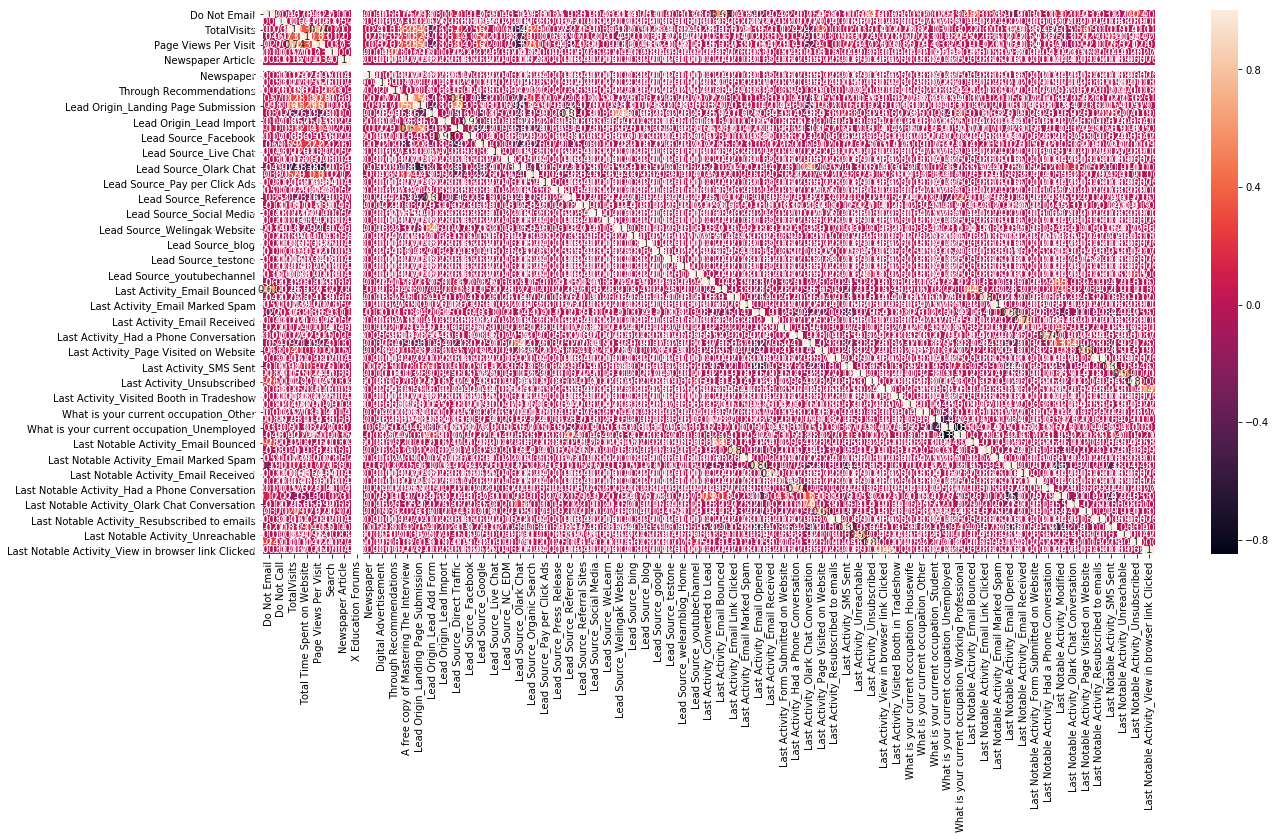

In [119]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_final.corr(),annot = True)
plt.show()

In [120]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [121]:
# checking the conversion rate
100 * (y.value_counts() / len(y)) 

0    62.195529
1    37.804471
Name: Converted, dtype: float64

### Step: Feature Selection Using RFE

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [123]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False])

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Search', False, 38),
 ('Newspaper Article', False, 14),
 ('X Education Forums', False, 57),
 ('Newspaper', False, 12),
 ('Digital Advertisement', False, 53),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 46),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 55),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1

In [126]:
col = X_train.columns[rfe.support_]

In [127]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on

##### Assessing the model with StatsModels

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.1
Date:                Sun, 06 Oct 2019   Deviance:                       5290.2
Time:                        12:18:46   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0018      0.050    -19.910      0.000      -1.100      -0.903
Do Not Email                                            -1.5494      0.167     -9.296      0.000      -1.876      -1.223
Total Time Spent on Website                              0.9554      0.035     27.172      0.000       0.887       1.024
Lead Origin_Lead Add Form                                3.7163      0.254     14.658      0.000       3.219       4.213
Lead Source_Direct Traffic                              -0.5373      0.078     -6.856      0.000      -0.691      -0.384
Lead Source_Referral Sites                              -0.4184      0.332     -1.259      0.208      -1.070       0.233
Lead Source_Welingak Website                             2.3298      1.043      2.234      0.025       0.286       4.374
Lead Source_google                                     -21.7468   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Last Activity_Converted to Lead                         -1.2675      0.210     -6.043      0.000      -1.679      -0.856
Last Activity_Had a Phone Conversation                   0.6265      0.908      0.690      0.490      -1.153       2.406
Last Activity_Olark Chat Conversation                   -1.1321      0.159     -7.113      0.000      -1.444      -0.820
What is your current occupation_Housewife               22.5573   1.82e+04      0.001      0.999   -3.56e+04    3.56e+04
What is your current occupation_Working Professional     2.8238      0.191     14.805      0.000       2.450       3.198
Last Notable Activity_Had a Phone Conversation           2.6717      1.421      1.880      0.060      -0.114       5.457
Last Notable Activity_SMS Sent                           1.5859      0.080     19.882      0.000       1.430       1.742
Last Notable Activity_Unreachable                        1.9412      0.527      3.681      0.000       0.908       2.975
========================================================================================================================
"""

In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Had a Phone Conversation,2.58
12,Last Notable Activity_Had a Phone Conversation,2.57
2,Lead Origin_Lead Add Form,1.47
5,Lead Source_Welingak Website,1.31
3,Lead Source_Direct Traffic,1.20
13,Last Notable Activity_SMS Sent,1.20
11,What is your current occupation_Working Profes...,1.15
1,Total Time Spent on Website,1.12
0,Do Not Email,1.07
9,Last Activity_Olark Chat Conversation,1.04


In [131]:
col = col.drop('Lead Source_google', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.7
Date:                Sun, 06 Oct 2019   Deviance:                       5293.4
Time:                        12:18:47   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0046      0.050    -19.973      0.000      -1.103      -0.906
Do Not Email                                            -1.5495      0.167     -9.299      0.000      -1.876      -1.223
Total Time Spent on Website                              0.9546      0.035     27.162      0.000       0.886       1.024
Lead Origin_Lead Add Form                                3.7180      0.254     14.665      0.000       3.221       4.215
Lead Source_Direct Traffic                              -0.5350      0.078     -6.828      0.000      -0.689      -0.381
Lead Source_Referral Sites                              -0.4160      0.332     -1.252      0.211      -1.067       0.235
Lead Source_Welingak Website                             2.3297      1.043      2.234      0.025       0.286       4.374
Last Activity_Converted to Lead                         -1.2652      0.210     -6.033      0.000      -1.676      -0.854
Last Activity_Had a Phone Conversation                   0.6289      0.908      0.692      0.489      -1.151       2.409
Last Activity_Olark Chat Conversation                   -1.1296      0.159     -7.098      0.000      -1.441      -0.818
What is your current occupation_Housewife               22.5593   1.81e+04      0.001      0.999   -3.56e+04    3.56e+04
What is your current occupation_Working Professional     2.8250      0.191     14.812      0.000       2.451       3.199
Last Notable Activity_Had a Phone Conversation           2.6714      1.421      1.880      0.060      -0.114       5.457
Last Notable Activity_SMS Sent                           1.5878      0.080     19.910      0.000       1.432       1.744
Last Notable Activity_Unreachable                        1.9430      0.527      3.685      0.000       0.910       2.976
========================================================================================================================
"""

In [133]:
# remove 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.4
Date:                Sun, 06 Oct 2019   Deviance:                       5298.8
Time:                        12:18:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0015      0.050    -19.930      0.000      -1.100      -0.903
Do Not Email                                            -1.5514      0.167     -9.309      0.000      -1.878      -1.225
Total Time Spent on Website                              0.9541      0.035     27.167      0.000       0.885       1.023
Lead Origin_Lead Add Form                                3.7384      0.253     14.766      0.000       3.242       4.235
Lead Source_Direct Traffic                              -0.5367      0.078     -6.853      0.000      -0.690      -0.383
Lead Source_Referral Sites                              -0.4182      0.332     -1.259      0.208      -1.069       0.233
Lead Source_Welingak Website                             2.3069      1.043      2.212      0.027       0.263       4.351
Last Activity_Converted to Lead                         -1.2673      0.210     -6.044      0.000      -1.678      -0.856
Last Activity_Had a Phone Conversation                   0.6264      0.908      0.690      0.490      -1.153       2.406
Last Activity_Olark Chat Conversation                   -1.1325      0.159     -7.118      0.000      -1.444      -0.821
What is your current occupation_Working Professional     2.8232      0.191     14.801      0.000       2.449       3.197
Last Notable Activity_Had a Phone Conversation           2.6711      1.421      1.880      0.060      -0.114       5.456
Last Notable Activity_SMS Sent                           1.5852      0.080     19.882      0.000       1.429       1.742
Last Notable Activity_Unreachable                        1.9402      0.527      3.680      0.000       0.907       2.974
========================================================================================================================
"""

In [135]:
# Drop column 'Last Activity_Had a Phone Conversation'
col = col.drop('Last Activity_Had a Phone Conversation',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [136]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.6
Date:                Sun, 06 Oct 2019   Deviance:                       5299.3
Time:                        12:18:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0000      0.050    -19.923      0.000      -1.098      -0.902
Do Not Email                                            -1.5523      0.167     -9.315      0.000      -1.879      -1.226
Total Time Spent on Website                              0.9542      0.035     27.168      0.000       0.885       1.023
Lead Origin_Lead Add Form                                3.7372      0.253     14.762      0.000       3.241       4.233
Lead Source_Direct Traffic                              -0.5371      0.078     -6.857      0.000      -0.691      -0.384
Lead Source_Referral Sites                              -0.4194      0.332     -1.262      0.207      -1.071       0.232
Lead Source_Welingak Website                             2.3072      1.043      2.212      0.027       0.263       4.351
Last Activity_Converted to Lead                         -1.2688      0.210     -6.051      0.000      -1.680      -0.858
Last Activity_Olark Chat Conversation                   -1.1340      0.159     -7.128      0.000      -1.446      -0.822
What is your current occupation_Working Professional     2.8251      0.191     14.817      0.000       2.451       3.199
Last Notable Activity_Had a Phone Conversation           3.2961      1.095      3.010      0.003       1.150       5.442
Last Notable Activity_SMS Sent                           1.5839      0.080     19.872      0.000       1.428       1.740
Last Notable Activity_Unreachable                        1.9389      0.527      3.677      0.000       0.906       2.972
========================================================================================================================
"""

In [137]:
# Drop the column 'Lead Source_Referral Sites'
col = col.drop('Lead Source_Referral Sites',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.5
Date:                Sun, 06 Oct 2019   Deviance:                       5301.0
Time:                        12:18:47   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0081      0.050    -20.226      0.000      -1.106      -0.910
Do Not Email                                            -1.5521      0.167     -9.316      0.000      -1.879      -1.226
Total Time Spent on Website                              0.9542      0.035     27.172      0.000       0.885       1.023
Lead Origin_Lead Add Form                                3.7447      0.253     14.794      0.000       3.249       4.241
Lead Source_Direct Traffic                              -0.5305      0.078     -6.786      0.000      -0.684      -0.377
Lead Source_Welingak Website                             2.3071      1.043      2.212      0.027       0.263       4.351
Last Activity_Converted to Lead                         -1.2680      0.210     -6.051      0.000      -1.679      -0.857
Last Activity_Olark Chat Conversation                   -1.1388      0.159     -7.151      0.000      -1.451      -0.827
What is your current occupation_Working Professional     2.8257      0.191     14.816      0.000       2.452       3.200
Last Notable Activity_Had a Phone Conversation           3.3026      1.095      3.017      0.003       1.157       5.448
Last Notable Activity_SMS Sent                           1.5886      0.080     19.947      0.000       1.433       1.745
Last Notable Activity_Unreachable                        1.9178      0.526      3.643      0.000       0.886       2.950
========================================================================================================================
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.30
3,Lead Source_Direct Traffic,1.20
9,Last Notable Activity_SMS Sent,1.20
7,What is your current occupation_Working Profes...,1.15
1,Total Time Spent on Website,1.12
0,Do Not Email,1.07
5,Last Activity_Converted to Lead,1.03
6,Last Activity_Olark Chat Conversation,1.03
8,Last Notable Activity_Had a Phone Conversation,1.00


In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [141]:
y_train_pred[:10]

array([0.98426679, 0.09206573, 0.49018105, 0.43518904, 0.13595441,
       0.46739898, 0.13595441, 0.11305142, 0.13595441, 0.15061263])

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,CustID
0,1,0.984267,1467
1,0,0.092066,108
2,1,0.490181,7858
3,1,0.435189,5220
4,0,0.135954,3871


##### Creating new column 'predicted' with 1 if Converted_prob > 0.8 else 0

In [143]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted
0,1,0.984267,1467,1
1,0,0.092066,108,0
2,1,0.490181,7858,0
3,1,0.435189,5220,0
4,0,0.135954,3871,0


In [144]:
y_train_pred_final['predicted'].value_counts()

0    5214
1    1079
Name: predicted, dtype: int64

In [145]:
from sklearn import metrics

#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [146]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3828,   98],
       [1386,  981]], dtype=int64)

In [147]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.764182424916574


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
TP

981

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4144486692015209

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9750382068262863

In [152]:
# Calculate false postive rate - predicting conversion rate when customer does not have converted
print(FP/ float(TN+FP))

0.024961793173713703


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.9091751621872104


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7341772151898734


### Step : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

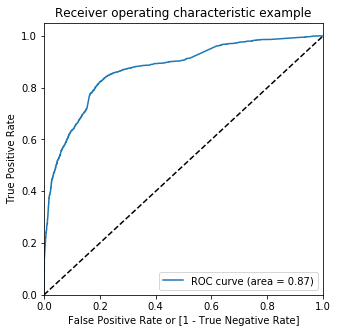

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step : Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.984267,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.092066,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.490181,7858,0,1,1,1,1,1,0,0,0,0,0
3,1,0.435189,5220,0,1,1,1,1,1,0,0,0,0,0
4,0,0.135954,3871,0,1,1,0,0,0,0,0,0,0,0


In [1]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

NameError: name 'pd' is not defined

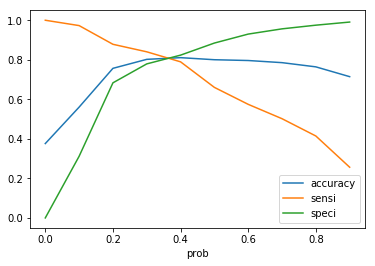

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.984267,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.092066,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.490181,7858,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.435189,5220,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.135954,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107420943905927

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3233,  693],
       [ 498, 1869]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7896070975918885

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.8234844625573102

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))# Positive predictive value 
print (TP / float(TP+FP))

0.17651553744268977
0.7295081967213115


In [169]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7295081967213115


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8665237201822568


## Precision and Recall

In [171]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3828,   98],
       [1386,  981]], dtype=int64)

In [172]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9091751621872104

##### Recall
TP / TP + FN

In [173]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.4144486692015209

Using sklearn utilities for the same

In [174]:
from sklearn.metrics import precision_score, recall_score

In [175]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9091751621872104

In [176]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.4144486692015209

### Precision and recall tradeoff

In [177]:
from sklearn.metrics import precision_recall_curve

In [178]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
 5       1
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      1
 24      1
 25      1
 26      0
 27      0
 28      1
 29      0
        ..
 6263    0
 6264    1
 6265    0
 6266    1
 6267    1
 6268    0
 6269    0
 6270    0
 6271    1
 6272    1
 6273    0
 6274    0
 6275    0
 6276    1
 6277    1
 6278    0
 6279    0
 6280    1
 6281    0
 6282    1
 6283    0
 6284    1
 6285    0
 6286    0
 6287    0
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      1
 24      0
 25      

In [179]:
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.984267,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.092066,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.490181,7858,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.435189,5220,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.135954,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [180]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

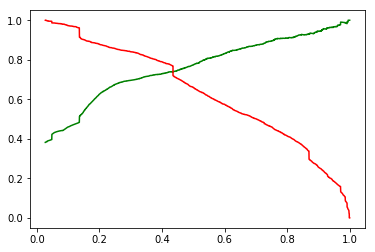

In [181]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

#### Scaling on X_test data 

In [182]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [183]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
8692,0,-0.321717,0,1,0,0,0,0,0,1,0
6126,0,-0.881587,1,0,0,0,0,0,0,1,0
5198,0,-0.098874,0,1,0,0,0,0,0,0,0
4979,0,0.704098,0,0,0,0,0,0,0,1,0
9225,1,-0.745303,0,1,0,0,0,0,0,0,0


In [184]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [185]:
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

8692    0.436114
6126    0.970229
5198    0.163433
4979    0.777714
9225    0.021841
3533    0.120294
2726    0.551764
3450    0.028050
7683    0.937776
6286    0.016316
dtype: float64

In [188]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [189]:
# Let's see the head
y_pred_1.head()

,0
8692,0.436114
6126,0.970229
5198,0.163433
4979,0.777714
9225,0.021841


In [190]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [191]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,Converted,CustID
8692,0,8692
6126,1,6126
5198,1,5198
4979,1,4979
9225,0,9225


In [192]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [193]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [194]:
y_pred_final.head()

,Converted,CustID,0
0,0,8692,0.436114
1,1,6126,0.970229
2,1,5198,0.163433
3,1,4979,0.777714
4,0,9225,0.021841


In [195]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [196]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [197]:
# Let's see the head of y_pred_final


,CustID,Converted,Converted_Prob
0,8692,0,0.436114
1,6126,1,0.970229
2,5198,1,0.163433
3,4979,1,0.777714
4,9225,0,0.021841
